<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/10_Wavelet_Three_class_model_s256_tr3478_ts_871.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import random
import pywt
import pywt.data
from tensorflow.keras.utils import to_categorical

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Clone Dataset

In [2]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/Covid-19-CXR-Dataset.git

Cloning into 'Covid-19-CXR-Dataset'...
remote: Enumerating objects: 4366, done.
remote: Total 4366 (delta 0), reused 0 (delta 0), pack-reused 4366
Receiving objects: 100% (4366/4366), 2.82 GiB | 33.57 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (4350/4350), done.


# Reading the Training images


In [3]:
size = 256

In [4]:
#Reading Training Images For Covid and Normal
import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/Covid-19-CXR-Dataset/train/Covid/*.*")
cv_img = []
for img in path_l:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
 
    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 


arrayl = np.asarray(cv_img)
print(arrayl.shape) 

path_2 = glob.glob("/content/Covid-19-CXR-Dataset/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.

    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array2 = np.asarray(cv_img) 
print(array2.shape) 


path_2 = glob.glob("/content/Covid-19-CXR-Dataset/train/Viral Pneumonia/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.

    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array5 = np.asarray(cv_img) 
print(array5.shape) 

(1330, 256, 256)
(1072, 256, 256)
(1076, 256, 256)


# Reading the Testing images


In [5]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/Covid-19-CXR-Dataset/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array3 = np.asarray(cv_img) 
print(array3.shape) 

path_2 = glob.glob("/content/Covid-19-CXR-Dataset/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.


    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array4 = np.asarray(cv_img)
print(array4.shape) 


path_2 = glob.glob("/content/Covid-19-CXR-Dataset/test/Viral Pneumonia/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.


    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
    n = cv2.resize(cA,(size,size))
    cv_img.append(n) 

array6 = np.asarray(cv_img)
print(array6.shape) 



(333, 256, 256)
(269, 256, 256)
(269, 256, 256)


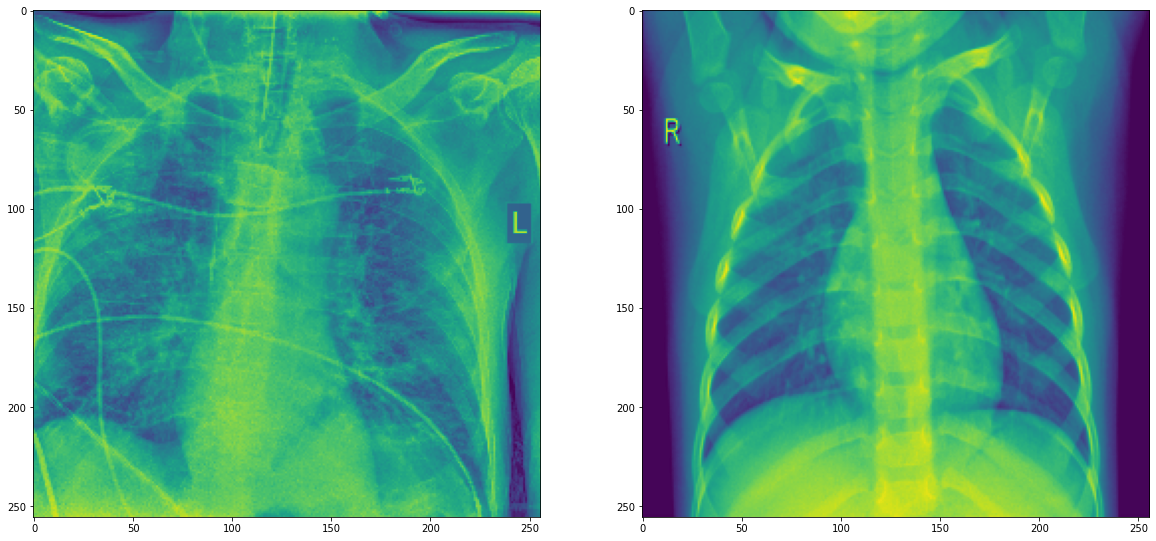

In [ ]:
matplotlib.pyplot.figure(num=None, figsize=[20,10])
plt.subplot(121),plt.imshow(arrayl[4])
plt.subplot(122),plt.imshow(array2[6])
plt.show()

# Concatenating Covid and Normal arrays into one variable for train and test:

In [6]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2,array5))

Xtest = np.concatenate((array3,array4, array6))

Xtrain.shape , Xtest.shape 

((3478, 256, 256), (871, 256, 256))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [7]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
labels2 = np.ones(len(array5)) 
for i in range(len(array5)):
  labels2[i] = 2


print('Normal labels : ',labels0 ,'Covid labels : ', labels1, 'Pneumonia : ', labels2) 
len(labels0) , len(labels1) , len(labels2)

Normal labels :  [0. 0. 0. ... 0. 0. 0.] Covid labels :  [1. 1. 1. ... 1. 1. 1.] Pneumonia :  [2. 2. 2. ... 2. 2. 2.]


(1330, 1072, 1076)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [8]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array3)) 
labels1s = np.ones(len(array4)) 
labels2s = np.ones(len(array6))
for i in range(len(array6)):
  labels2s[i] = 2

print('Normal labels : ',labels0s ,'Covid labels : ', labels1s, 'Pneumonia : ', labels2s) 
len(labels0s) , len(labels1s), len(labels2s)

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(333, 269, 269)

# Concatenating the labels for Covid and Normal for training and testing:

In [9]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0, labels1, labels2)) 
ytest = np.concatenate((labels0s, labels1s, labels2s)) 
ytrain.shape, ytest.shape

((3478,), (871,))

# Splitting the dataset for validation data:

In [10]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,test_size = 0.2, shuffle = True) 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 


((2782, 256, 256), (696, 256, 256), (2782,), (696,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [11]:
# Normalizing the data from 0 to 255 to 0 to 1:

X_train = X_train/255 
X_valid = X_valid/255
Xtest = Xtest/255 


In [12]:
X_train = X_train.reshape(X_train.shape[0],size,size,1)
X_train.shape

(2782, 256, 256, 1)

In [13]:
X_valid = X_valid.reshape(X_valid.shape[0],size,size,1)
X_valid.shape

(696, 256, 256, 1)

In [14]:
Xtest = Xtest.reshape(Xtest.shape[0],size,size,1)
Xtest.shape

(871, 256, 256, 1)

## Building the Model

## 2 convolutional layers

In [ ]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

## 3 convolutional layers

In [ ]:
# Model With Dropout Layer


model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model2.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model2.add(Dropout(0.5))

# add another convolutional layer
model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model2.add(Flatten())

# add a dense layer : amount of nodes, activation
model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model2.add(Dropout(0.5))
model2.add(Dense(3, activation = 'softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)       

## 4 convolutional layers

In [ ]:
# Model With Dropout Layer


model3 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model3.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5))

# add another convolutional layer
model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5))

# add another convolutional layer
model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model3.add(Dropout(0.5))


# Flatten the image to 1 dimensional array
model3.add(Flatten())

# add a dense layer : amount of nodes, activation
model3.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model3.add(Dropout(0.5))
model3.add(Dense(3, activation = 'softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

## 5 convolutional layers

In [ ]:
# Model With Dropout Layer


model4 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model4.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5))

# add another convolutional layer
model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5))

# add another convolutional layer
model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model4.add(Dropout(0.5))


# Flatten the image to 1 dimensional array
model4.add(Flatten())

# add a dense layer : amount of nodes, activation
model4.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model4.add(Dropout(0.5))
model4.add(Dense(3, activation = 'softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

## Compile The Model

In [ ]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model2.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model3.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model4.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


## Train the Model

In [ ]:
# train the model
%%time
model_history = model.fit(X_train,y_train,epochs = 30,validation_data=(X_valid,y_valid),verbose = 1)

Epoch 1/30
87/87 [==============================] - 37s 70ms/step - loss: 5.3182 - accuracy: 0.6122 - val_loss: 0.3605 - val_accuracy: 0.8779
Epoch 2/30
87/87 [==============================] - 4s 48ms/step - loss: 0.2624 - accuracy: 0.9057 - val_loss: 0.2394 - val_accuracy: 0.9080
Epoch 3/30
87/87 [==============================] - 4s 48ms/step - loss: 0.2098 - accuracy: 0.9240 - val_loss: 0.2046 - val_accuracy: 0.9411
Epoch 4/30
87/87 [==============================] - 4s 48ms/step - loss: 0.1491 - accuracy: 0.9508 - val_loss: 0.2049 - val_accuracy: 0.9339
Epoch 5/30
87/87 [==============================] - 4s 48ms/step - loss: 0.1232 - accuracy: 0.9540 - val_loss: 0.1299 - val_accuracy: 0.9540
Epoch 6/30
87/87 [==============================] - 4s 49ms/step - loss: 0.1005 - accuracy: 0.9605 - val_loss: 0.1322 - val_accuracy: 0.9468
Epoch 7/30
87/87 [==============================] - 4s 49ms/step - loss: 0.0715 - accuracy: 0.9731 - val_loss: 0.1383 - val_accuracy: 0.9511
Epoch 8/30
8

In [ ]:
# train the model
%%time
model_history2 = model2.fit(X_train,y_train,epochs = 30,validation_data=(X_valid,y_valid),verbose = 1)

Epoch 1/30
87/87 [==============================] - 6s 59ms/step - loss: 2.3556 - accuracy: 0.4906 - val_loss: 0.4573 - val_accuracy: 0.8247
Epoch 2/30
87/87 [==============================] - 4s 49ms/step - loss: 0.3580 - accuracy: 0.8694 - val_loss: 0.3764 - val_accuracy: 0.8807
Epoch 3/30
87/87 [==============================] - 4s 49ms/step - loss: 0.2879 - accuracy: 0.8915 - val_loss: 0.2293 - val_accuracy: 0.9152
Epoch 4/30
87/87 [==============================] - 4s 49ms/step - loss: 0.2224 - accuracy: 0.9240 - val_loss: 0.1861 - val_accuracy: 0.9325
Epoch 5/30
87/87 [==============================] - 4s 50ms/step - loss: 0.1982 - accuracy: 0.9310 - val_loss: 0.1576 - val_accuracy: 0.9468
Epoch 6/30
87/87 [==============================] - 4s 49ms/step - loss: 0.1795 - accuracy: 0.9394 - val_loss: 0.1850 - val_accuracy: 0.9339
Epoch 7/30
87/87 [==============================] - 4s 49ms/step - loss: 0.1391 - accuracy: 0.9470 - val_loss: 0.1343 - val_accuracy: 0.9555
Epoch 8/30
87

In [ ]:
# train the model
%%time
model_history3 = model3.fit(X_train,y_train,epochs = 30,validation_data=(X_valid,y_valid),verbose = 1)

Epoch 1/30
87/87 [==============================] - 6s 54ms/step - loss: 1.5927 - accuracy: 0.5072 - val_loss: 0.6253 - val_accuracy: 0.8261
Epoch 2/30
87/87 [==============================] - 4s 51ms/step - loss: 0.4326 - accuracy: 0.8232 - val_loss: 0.4300 - val_accuracy: 0.8549
Epoch 3/30
87/87 [==============================] - 4s 50ms/step - loss: 0.3471 - accuracy: 0.8643 - val_loss: 0.3822 - val_accuracy: 0.9124
Epoch 4/30
87/87 [==============================] - 4s 50ms/step - loss: 0.2850 - accuracy: 0.8905 - val_loss: 0.4268 - val_accuracy: 0.8966
Epoch 5/30
87/87 [==============================] - 4s 51ms/step - loss: 0.2769 - accuracy: 0.9003 - val_loss: 0.2307 - val_accuracy: 0.9382
Epoch 6/30
87/87 [==============================] - 4s 51ms/step - loss: 0.2205 - accuracy: 0.9242 - val_loss: 0.1575 - val_accuracy: 0.9598
Epoch 7/30
87/87 [==============================] - 4s 50ms/step - loss: 0.1901 - accuracy: 0.9345 - val_loss: 0.2141 - val_accuracy: 0.9468
Epoch 8/30
87

In [ ]:
# train the model
%%time
model_history4 = model4.fit(X_train,y_train,epochs = 30,validation_data=(X_valid,y_valid),verbose = 1)

Epoch 1/30
87/87 [==============================] - 5s 53ms/step - loss: 1.1750 - accuracy: 0.5543 - val_loss: 0.5812 - val_accuracy: 0.7859
Epoch 2/30
87/87 [==============================] - 4s 50ms/step - loss: 0.4440 - accuracy: 0.8271 - val_loss: 0.3721 - val_accuracy: 0.9066
Epoch 3/30
87/87 [==============================] - 4s 51ms/step - loss: 0.3077 - accuracy: 0.8788 - val_loss: 0.3217 - val_accuracy: 0.9124
Epoch 4/30
87/87 [==============================] - 4s 51ms/step - loss: 0.2464 - accuracy: 0.9074 - val_loss: 0.2832 - val_accuracy: 0.9239
Epoch 5/30
87/87 [==============================] - 4s 50ms/step - loss: 0.2110 - accuracy: 0.9238 - val_loss: 0.1894 - val_accuracy: 0.9411
Epoch 6/30
87/87 [==============================] - 4s 51ms/step - loss: 0.2074 - accuracy: 0.9232 - val_loss: 0.1482 - val_accuracy: 0.9440
Epoch 7/30
87/87 [==============================] - 4s 50ms/step - loss: 0.1663 - accuracy: 0.9352 - val_loss: 0.2011 - val_accuracy: 0.9483
Epoch 8/30
87

# Evaluating the model

In [ ]:
# Evaluating the model:
%%time
model.evaluate(Xtest,ytest,verbose= 1)

28/28 [==============================] - 1s 18ms/step - loss: 0.1633 - accuracy: 0.9587
CPU times: user 485 ms, sys: 90.3 ms, total: 576 ms
Wall time: 710 ms


[0.1632576584815979, 0.9586681723594666]

In [ ]:
# Evaluating the model:
%%time
model2.evaluate(Xtest,ytest,verbose= 1)

28/28 [==============================] - 1s 18ms/step - loss: 0.1637 - accuracy: 0.9564
CPU times: user 446 ms, sys: 71.9 ms, total: 518 ms
Wall time: 656 ms


[0.16367366909980774, 0.9563719630241394]

In [ ]:
# Evaluating the model:
%%time
model3.evaluate(Xtest,ytest,verbose= 1)

28/28 [==============================] - 1s 18ms/step - loss: 0.1138 - accuracy: 0.9610
CPU times: user 424 ms, sys: 49 ms, total: 473 ms
Wall time: 646 ms


[0.11383209377527237, 0.9609643816947937]

In [ ]:
# Evaluating the model:
%%time
model4.evaluate(Xtest,ytest,verbose= 1)

28/28 [==============================] - 1s 17ms/step - loss: 0.0820 - accuracy: 0.9724
CPU times: user 373 ms, sys: 583 ms, total: 955 ms
Wall time: 1.13 s


[0.0820113942027092, 0.9724454879760742]

# Plot performance metrics

## 2 conv accuracu and loss

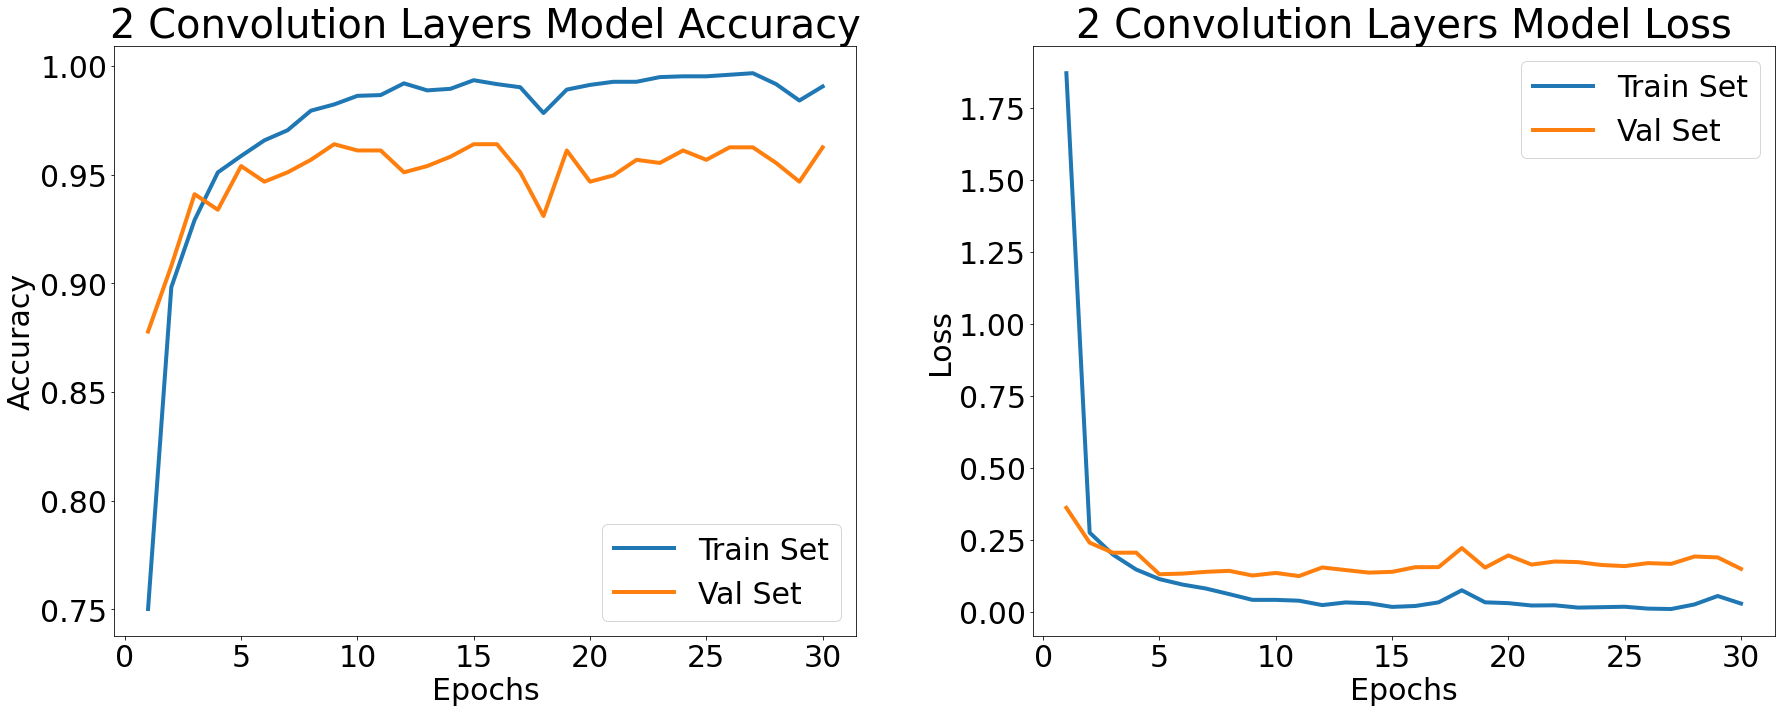

In [ ]:

# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
# plot model performance
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs_range = range(1, len(model_history.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('2 Convolution Layers Model Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('2 Convolution Layers Model Loss',fontsize=40)

plt.tight_layout()
plt.show()

## 3 conv accuracu and loss

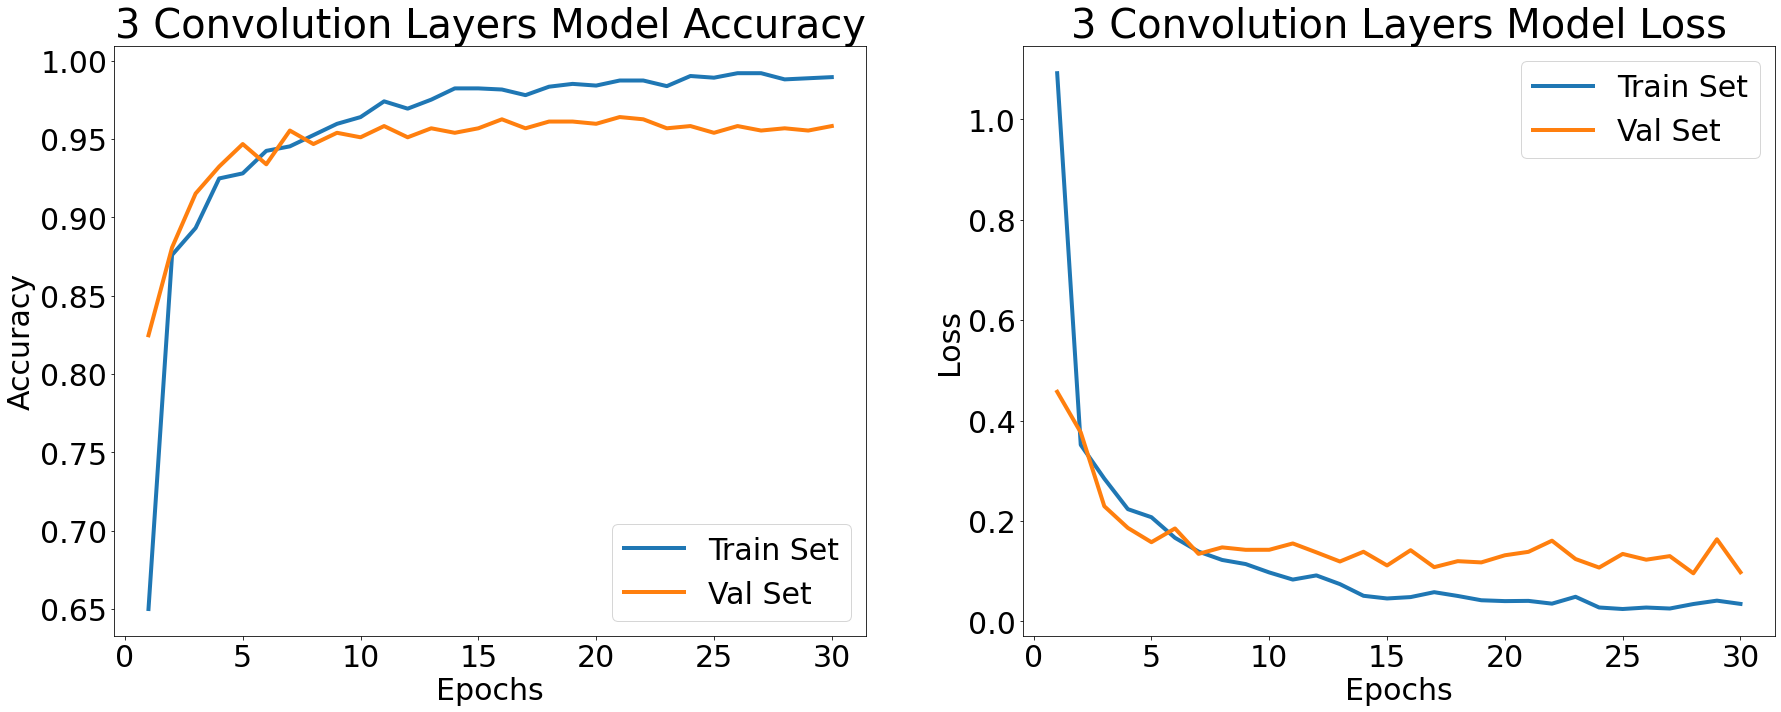

In [ ]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
# plot model performance
acc = model_history2.history['accuracy']
val_acc = model_history2.history['val_accuracy']
loss = model_history2.history['loss']
val_loss = model_history2.history['val_loss']
epochs_range = range(1, len(model_history2.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('3 Convolution Layers Model Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('3 Convolution Layers Model Loss',fontsize=40)

plt.tight_layout()
plt.show()

## 4 conv accuracu and loss

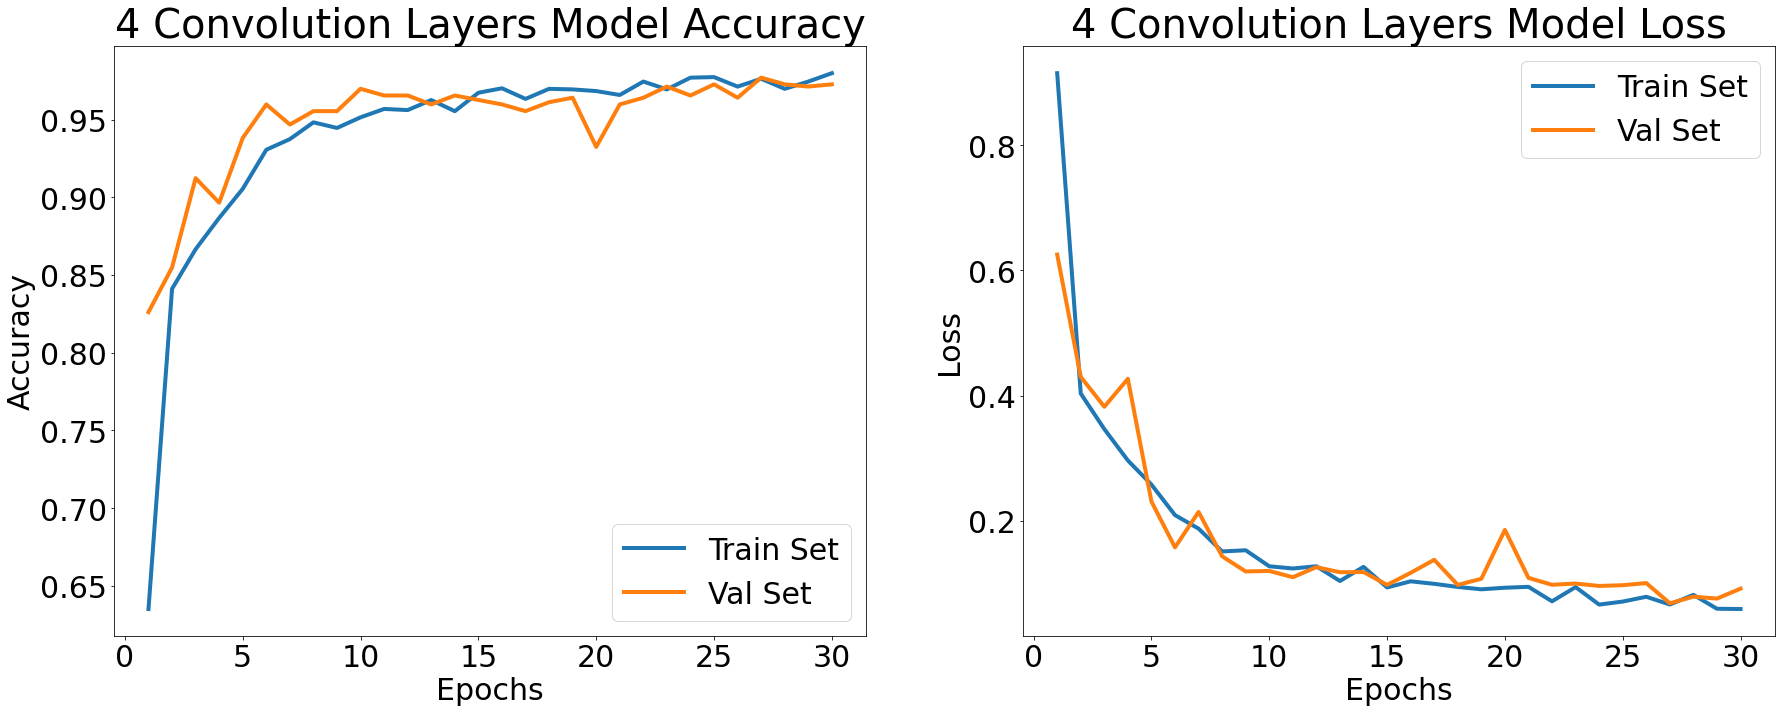

In [ ]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
# plot model performance
acc = model_history3.history['accuracy']
val_acc = model_history3.history['val_accuracy']
loss = model_history3.history['loss']
val_loss = model_history3.history['val_loss']
epochs_range = range(1, len(model_history3.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('4 Convolution Layers Model Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('4 Convolution Layers Model Loss',fontsize=40)

plt.tight_layout()
plt.show()

## 5 conv accuracu and loss

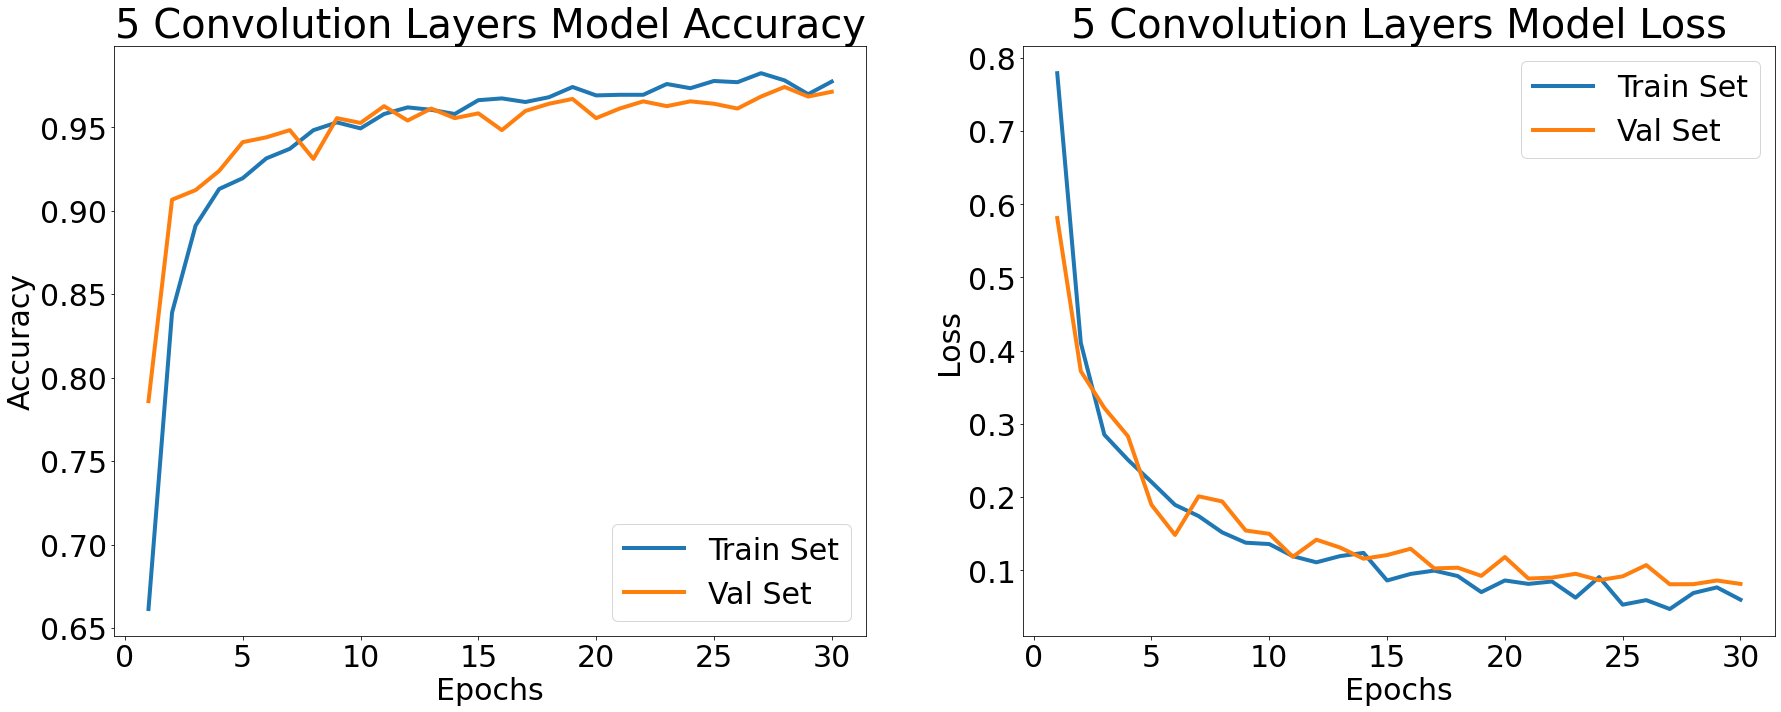

In [ ]:

# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
# plot model performance
acc = model_history4.history['accuracy']
val_acc = model_history4.history['val_accuracy']
loss = model_history4.history['loss']
val_loss = model_history4.history['val_loss']
epochs_range = range(1, len(model_history4.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('5 Convolution Layers Model Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('5 Convolution Layers Model Loss',fontsize=40)

plt.tight_layout()
plt.show()

# Confusion Matrix

## 2 conv confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


28/28 [==============================] - 1s 15ms/step


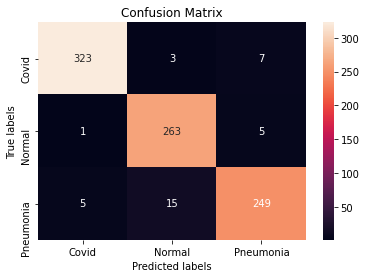

In [ ]:
pred  = model.predict_classes(Xtest,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);


In [ ]:
TP = 48
TN = 47
FN = 2
FP = 3
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 96.0
Specificity 94.0
Precision 94.11764705882352
Misclassification Rate 0.05
Prevalence 50.0


## 3 conv confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


28/28 [==============================] - 1s 15ms/step


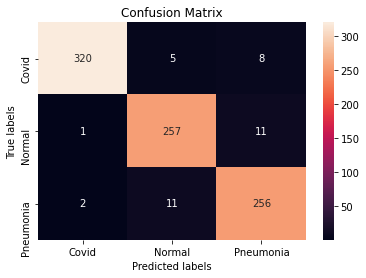

In [ ]:
pred  = model2.predict_classes(Xtest,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

In [ ]:
TP = 49
TN = 49
FN = 1
FP = 1
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 98.0
Specificity 98.0
Precision 98.0
Misclassification Rate 0.02
Prevalence 50.0


## 4 conv confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


28/28 [==============================] - 1s 15ms/step


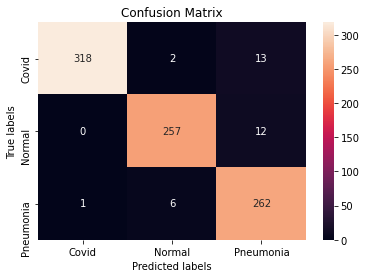

In [ ]:
pred  = model3.predict_classes(Xtest,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

In [ ]:
TP = 49
TN = 48
FN = 1
FP = 2
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 98.0
Specificity 96.0
Precision 96.07843137254902
Misclassification Rate 0.03
Prevalence 50.0


## 5 conv confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


28/28 [==============================] - 1s 16ms/step


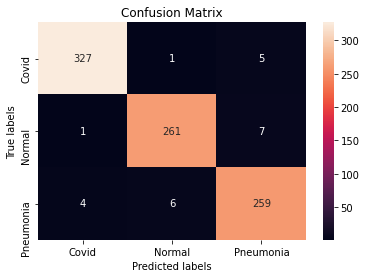

In [ ]:
pred  = model4.predict_classes(Xtest,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']); ax.yaxis.set_ticklabels(['Covid', 'Normal','Pneumonia']);

In [ ]:
TP = 48
TN = 48
FN = 2
FP = 2
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 96.0
Specificity 96.0
Precision 96.0
Misclassification Rate 0.04
Prevalence 50.0


## Saving The Model

In [ ]:
# model_save_name = 'model.h5'
# path = F"/content/{model_save_name}" 
# model.save(path)

# Loading the Model

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# from tensorflow.keras.models import load_model

# model = load_model('/content/gdrive/MyDrive/Temp/Model trained without ImageDataGenerator.h5')

# performance matrix

In [ ]:
from sklearn.metrics import precision_score,f1_score,recall_score
pred  = model.predict_classes(Xtest,verbose= 0)

pr, f1, recal = precision_score(ytest,pred,average='micro'), f1_score(ytest,pred,average='micro'), recall_score(ytest,pred,average='micro')
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision = 0.959 
F1 Score = 0.959 
Recall = 0.959


In [ ]:
pred  = model2.predict_classes(Xtest,verbose= 0)

pr, f1, recal = precision_score(ytest,pred,average='micro'), f1_score(ytest,pred,average='micro'), recall_score(ytest,pred,average='micro')
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision = 0.956 
F1 Score = 0.956 
Recall = 0.956


In [ ]:
pred  = model3.predict_classes(Xtest,verbose= 0)

pr, f1, recal = precision_score(ytest,pred,average='micro'), f1_score(ytest,pred,average='micro'), recall_score(ytest,pred,average='micro')
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision = 0.961 
F1 Score = 0.961 
Recall = 0.961


In [ ]:
pred  = model4.predict_classes(Xtest,verbose= 0)

pr, f1, recal = precision_score(ytest,pred,average='micro'), f1_score(ytest,pred,average='micro'), recall_score(ytest,pred,average='micro')
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Precision = 0.972 
F1 Score = 0.972 
Recall = 0.972


# classification_report

## 2 conv classification report

In [ ]:
from sklearn.metrics import classification_report
pred  = model.predict_classes(Xtest,verbose= 0)
print(classification_report(ytest, pred))
print('covid19 = 0 \nnormal = 1 \n Viral Pneumonia = 2')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       333
         1.0       0.94      0.98      0.96       269
         2.0       0.95      0.93      0.94       269

    accuracy                           0.96       871
   macro avg       0.96      0.96      0.96       871
weighted avg       0.96      0.96      0.96       871

covid19 = 0 
normal = 1 
 Viral Pneumonia = 2


## 3 conv classification report

In [ ]:
from sklearn.metrics import classification_report
pred  = model2.predict_classes(Xtest,verbose= 0)
print(classification_report(ytest, pred))
print('covid19 = 0 \nnormal = 1 \n Viral Pneumonia = 2')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       333
         1.0       0.94      0.96      0.95       269
         2.0       0.93      0.95      0.94       269

    accuracy                           0.96       871
   macro avg       0.95      0.96      0.96       871
weighted avg       0.96      0.96      0.96       871

covid19 = 0 
normal = 1 
 Viral Pneumonia = 2


## 4 conv classification report

In [ ]:
from sklearn.metrics import classification_report
pred  = model3.predict_classes(Xtest,verbose= 0)
print(classification_report(ytest, pred))
print('covid19 = 0 \nnormal = 1 \n Viral Pneumonia = 2')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98       333
         1.0       0.97      0.96      0.96       269
         2.0       0.91      0.97      0.94       269

    accuracy                           0.96       871
   macro avg       0.96      0.96      0.96       871
weighted avg       0.96      0.96      0.96       871

covid19 = 0 
normal = 1 
 Viral Pneumonia = 2


## 5 conv classification report

In [ ]:
from sklearn.metrics import classification_report
pred  = model4.predict_classes(Xtest,verbose= 0)
print(classification_report(ytest, pred))
print('covid19 = 0 \nnormal = 1 \n Viral Pneumonia = 2')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       333
         1.0       0.97      0.97      0.97       269
         2.0       0.96      0.96      0.96       269

    accuracy                           0.97       871
   macro avg       0.97      0.97      0.97       871
weighted avg       0.97      0.97      0.97       871

covid19 = 0 
normal = 1 
 Viral Pneumonia = 2


# K-Fold cross validation


## 2 conv K fold

In [ ]:
# Model With Dropout Layer


def build_model():
  model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5)) ## Minimizes the overfitting

  # add another convolutional layer
  model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5))

  # Flatten the image to 1 dimensional array
  model.add(Flatten())

  # add a dense layer : amount of nodes, activation
  model.add(Dense(256, activation = 'relu'))

  # place a dropout layer
  # 0.5 drop out rate is recommended, half input will be dropped at each update
  model.add(Dropout(0.5))
  model.add(Dense(3, activation = 'softmax'))

  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
  model.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
%%time

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

Epoch 1/30
70/70 [==============================] - 34s 47ms/step - loss: 8.6881 - accuracy: 0.4924
Epoch 2/30
70/70 [==============================] - 3s 44ms/step - loss: 0.3946 - accuracy: 0.8483
Epoch 3/30
70/70 [==============================] - 3s 44ms/step - loss: 0.2119 - accuracy: 0.9234
Epoch 4/30
70/70 [==============================] - 3s 43ms/step - loss: 0.1467 - accuracy: 0.9453
Epoch 5/30
70/70 [==============================] - 3s 43ms/step - loss: 0.1425 - accuracy: 0.9455
Epoch 6/30
70/70 [==============================] - 3s 43ms/step - loss: 0.1397 - accuracy: 0.9539
Epoch 7/30
70/70 [==============================] - 3s 44ms/step - loss: 0.1082 - accuracy: 0.9642
Epoch 8/30
70/70 [==============================] - 3s 44ms/step - loss: 0.0739 - accuracy: 0.9694
Epoch 9/30
70/70 [==============================] - 3s 43ms/step - loss: 0.0648 - accuracy: 0.9785
Epoch 10/30
70/70 [==============================] - 3s 43ms/step - loss: 0.0579 - accuracy: 0.9809
Epoch 11

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

Accuracies per K-Fold  [0.96409333 0.95152605 0.95863307 0.95143884 0.97661871]


0.9604619979858399

In [ ]:
results.max()

0.9766187071800232

In [ ]:
results.min()

0.951438844203949

In [ ]:
results.std()

0.009368450745866598

## 3 conv K fold

In [15]:
# Model With Dropout Layer


def build_model2():
  model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model2.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

# pooling layer
  model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
  model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model2.add(Dropout(0.5))

# add another convolutional layer
  model2.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
  model2.add(Flatten())

# add a dense layer : amount of nodes, activation
  model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
  model2.add(Dropout(0.5))
  model2.add(Dense(3, activation = 'softmax'))
  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
  # Loss function definition
  model2.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model2



In [ ]:
%%time
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model2, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

Epoch 1/30
70/70 [==============================] - 40s 88ms/step - loss: 1.7058 - accuracy: 0.5535
Epoch 2/30
70/70 [==============================] - 5s 75ms/step - loss: 0.3276 - accuracy: 0.8795
Epoch 3/30
70/70 [==============================] - 5s 75ms/step - loss: 0.2381 - accuracy: 0.9066
Epoch 4/30
70/70 [==============================] - 5s 75ms/step - loss: 0.2002 - accuracy: 0.9298
Epoch 5/30
70/70 [==============================] - 5s 75ms/step - loss: 0.1920 - accuracy: 0.9266
Epoch 6/30
70/70 [==============================] - 5s 75ms/step - loss: 0.1367 - accuracy: 0.9513
Epoch 7/30
70/70 [==============================] - 5s 75ms/step - loss: 0.0999 - accuracy: 0.9627
Epoch 8/30
70/70 [==============================] - 5s 74ms/step - loss: 0.1150 - accuracy: 0.9582
Epoch 9/30
70/70 [==============================] - 5s 74ms/step - loss: 0.1069 - accuracy: 0.9537
Epoch 10/30
70/70 [==============================] - 5s 75ms/step - loss: 0.0893 - accuracy: 0.9673
Epoch 11

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
results.max()

In [ ]:
results.min()

In [ ]:
results.std()

## 4 conv K fold

In [ ]:
# Model With Dropout Layer

def build_model3():
  model3 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model3.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
  model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5))

# add another convolutional layer
  model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5))

# add another convolutional layer
  model3.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model3.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model3.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
  model3.add(Flatten())

# add a dense layer : amount of nodes, activation
  model3.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
  model3.add(Dropout(0.5))
  model3.add(Dense(3, activation = 'softmax'))
  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
  # Loss function definition
  model3.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model3



In [ ]:
%%time
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model3, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
results.max()

In [ ]:
results.min()

In [ ]:
results.std()

## 5 conv K fold

In [ ]:
# Model With Dropout Layer

def build_model4():
  model4 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model4.add(Conv2D(32,(5,5),padding = 'SAME', activation = 'relu', input_shape = (size,size,1)))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

# add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

# add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

  # add another convolutional layer
  model4.add(Conv2D(64,(5,5),padding = 'SAME', activation = 'relu'))

# pooling layer
  model4.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
  model4.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
  model4.add(Flatten())

# add a dense layer : amount of nodes, activation
  model4.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
  model4.add(Dropout(0.5))
  model4.add(Dense(3, activation = 'softmax'))
  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
  # Loss function definition
  model4.compile(Adam(lr = 0.001),loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model4



In [ ]:
%%time
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model4, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
results.max()

In [ ]:
results.min()

In [ ]:
results.std()